# Challenge 3
## Fernando Hidalgo

In [600]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, cross_validation, preprocessing, linear_model

%matplotlib inline

In [338]:
data = pd.read_csv('~/ds/metis/nyc16_ds8/challenges/challenges_data/2013_movies.csv')

In [339]:
data.columns = [column.lower() for column in data.columns]

In [340]:
data.budget.fillna(data.budget.mean(), inplace = True)

In [341]:
data['releasedate'] =  data.releasedate.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [344]:
data['month'] = data.releasedate.apply(lambda x: x.strftime('%B'))
data['day'] = data.releasedate.apply(lambda x: x.strftime('%A'))

In [347]:
data.head()

,title,budget,domestictotalgross,director,rating,runtime,releasedate,month,day
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,November,Friday
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,May,Friday
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,November,Friday
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,July,Wednesday
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,June,Friday


## Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?



In [483]:
X_1 = [1 for i in range(len(data))]
y_1 = data.domestictotalgross

In [513]:
X_1_train, X_1_test, y_1_train, y_1_test = cross_validation.train_test_split(X_1, y_1)
y_1_test = np.array(y_1_test).reshape(25,1)

reg_1 = linear_model.LinearRegression()
reg_1.fit(np.array(X_1_train).reshape(75,1),y_1_train)
pred_1 = reg_1.predict(np.array(X_1_test).reshape(25,1))


In [512]:
reg_1.score(np.array(X_1_test).reshape(25,1), y_1_test)

-0.041139613312628054

In [485]:
np.array(y_1_train).mean()

102239116.86666666

In [601]:
print reg_1.coef_
print reg_1.intercept_

[ 0.]
106917673.227


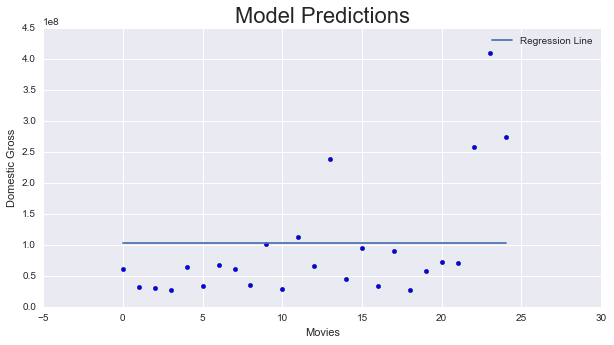

In [493]:
g = plt.scatter(range(len(y_1_test)), y_1_test)

plt.plot(range(len(y_1_test)), pred_1, label = 'Regression Line')
g.figure.set_size_inches(10,5)
plt.title('Model Predictions', fontsize = 22)
plt.xlabel('Movies')
plt.ylabel('Domestic Gross')
plt.legend()

In [394]:
np.ones((4))

array([ 1.,  1.,  1.,  1.])

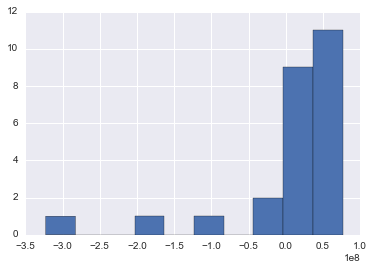

In [381]:
_ = plt.hist((pred_1-test) )

### Interpretation


- Since there is no variability in the independent variable for different domestic gross then the models will predict the mean of domestic gross. There is no insight in the data aside from the dependent variable. 
- The model has a very low R squared score, it gives us the baseline prediction. Any models better than this is a model with some insight. 

# Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?



In [421]:
df_2_data = {'constant': np.array([1 for i in range(len(data))]),
             'budget':data.budget}   

X_2 = pd.DataFrame(df_2_data)
y_2 = data.domestictotalgross

In [501]:
X_2_train, X_2_test, y_2_train, y_2_test = cross_validation.train_test_split(X_2, y_2)
y_2_test = np.array(y_2_test)

reg_2 = linear_model.LinearRegression()

reg_2.fit(np.array(X_2_train),y_2_train)

pred_2 = reg_2.predict(np.array(X_2_test))

In [502]:
reg_2.score(X_2_test, y_2_test)

0.22806433899030176

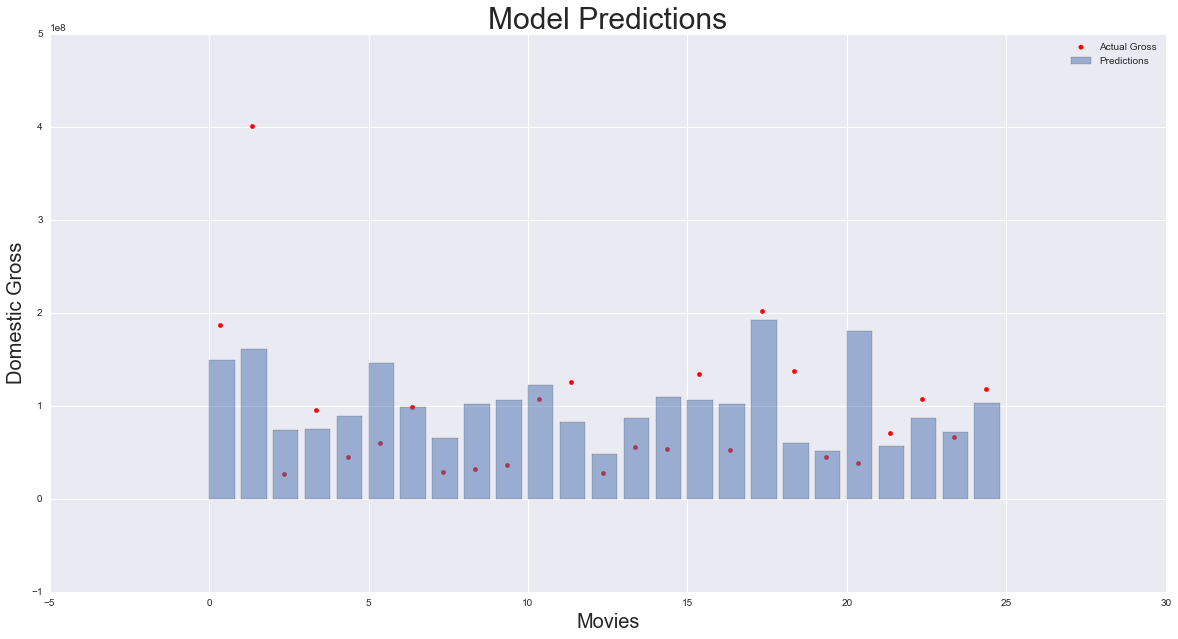

In [495]:
g = plt.scatter(np.array(range(len(y_2_test)))+.35, y_2_test, color = 'r', label = 'Actual Gross')

plt.bar(range(len(y_2_test)), pred_2,alpha = .5, label = 'Predictions')
g.figure.set_size_inches(20,10)
plt.title('Model Predictions', fontsize = 30)
plt.xlabel('Movies', fontsize = 20)
plt.ylabel('Domestic Gross', fontsize = 20)
_ = plt.legend()

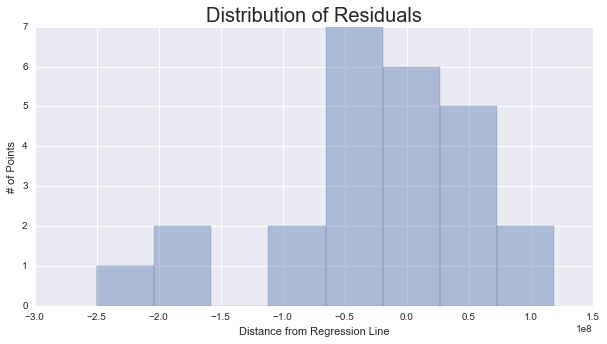

In [514]:
sns.distplot(pred_2-y_2_test, kde = False)
g = plt.title('Distribution of Residuals',fontsize = 20)
g.figure.set_size_inches(10,5)
plt.xlabel('Distance from Regression Line')
plt.ylabel('# of Points')

### Interpretation

- We can see from the residual plot that this model has more predictive power than the first one since distance from the regression line follow a more normal distribution. 
- However it is clear that the model is still not a strong predictor by the low R squared score and the skewed distribution of the residuals.

# Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?



In [540]:

rating_dummies = pd.get_dummies(data.rating, drop_first= True, prefix = 'rating')
rating_dummies['Constant'] = np.array([1 for i in range(len(data))])

X_3 = rating_dummies
y_3 = data.domestictotalgross

In [541]:
X_3_train, X_3_test, y_3_train, y_3_test = cross_validation.train_test_split(X_3, y_3)
y_3_test = np.array(y_3_test)

reg_3 = linear_model.LinearRegression()

reg_3.fit(np.array(X_3_train),y_3_train)

pred_3 = reg_3.predict(np.array(X_3_test))

In [545]:
reg_3.score(X_3_test, y_3_test)

-0.038761799552504916

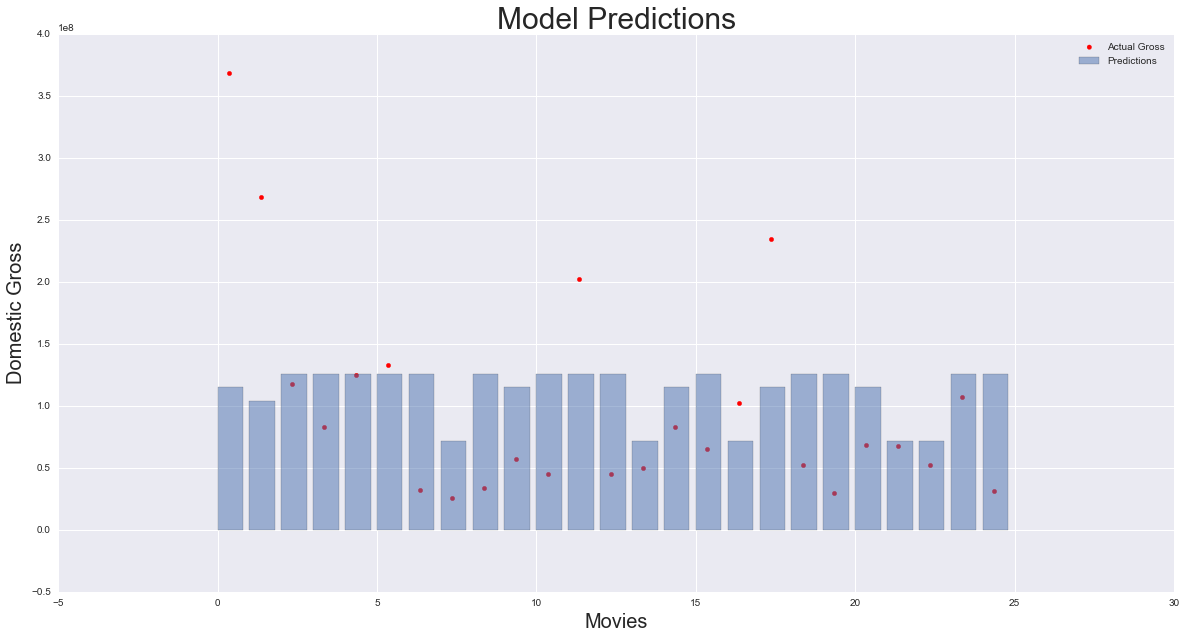

In [546]:
g = plt.scatter(np.array(range(len(y_3_test)))+.35, y_3_test, color = 'r', label = 'Actual Gross')

plt.bar(range(len(y_3_test)), pred_3,alpha = .5, label = 'Predictions')
g.figure.set_size_inches(20,10)
plt.title('Model Predictions', fontsize = 30)
plt.xlabel('Movies', fontsize = 20)
plt.ylabel('Domestic Gross', fontsize = 20)
_ = plt.legend()

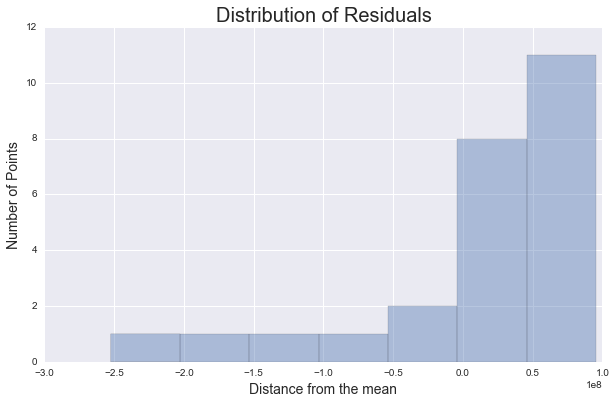

In [556]:
g = sns.distplot(pred_3-y_3_test, kde = False)
g.figure.set_size_inches(10,6)
plt.title('Distribution of Residuals', fontsize = 20)
plt.xlabel('Distance from the mean', fontsize = 14)
_ = plt.ylabel('Number of Points', fontsize = 14)

### Interpretation

- This model performs worse than the second model that had a continuous independent variable. This is due to the less variability in the independent variable; meaning that the model has less intelligence to extract from the variable. 
- It's poor performace is seen with the low R squared and left skewed residuals. It's predictive power is close to the first model which just showed the baseline
- This also shows that genre is not a predictive of domestic gross.

## Challenge 4 & 5

- Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

- Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.



In [594]:
day_dummies = pd.get_dummies(data.day, drop_first=True, prefix = 'day')
month_dummies = pd.get_dummies(data.month, drop_first = True, prefix = 'month')
rating_dummies = pd.get_dummies(data.rating, drop_first = True, prefix = 'rating')

X_4 = data[['budget', 'runtime']].join([day_dummies, month_dummies, rating_dummies])
y_4 = data['domestictotalgross']

In [595]:
X_4_train, X_4_test, y_4_train, y_4_test = cross_validation.train_test_split(X_4, y_4)
y_4_test = np.array(y_4_test)

reg_4 = linear_model.LinearRegression()

reg_4.fit(np.array(X_4_train),y_4_train)

pred_4 = reg_4.predict(np.array(X_4_test))

In [596]:
reg_4.score(X_4_test, y_4_test)

0.060525146541567154

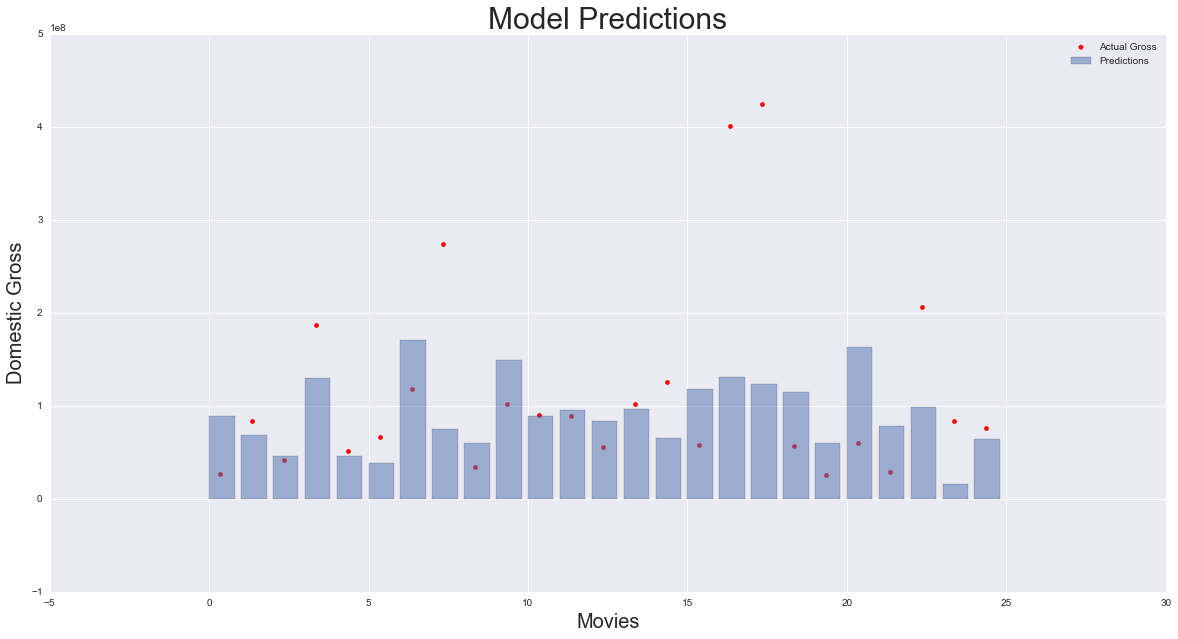

In [597]:
g = plt.scatter(np.array(range(len(y_4_test)))+.35, y_4_test, color = 'r', label = 'Actual Gross')

plt.bar(range(len(y_4_test)), pred_4,alpha = .5, label = 'Predictions')
g.figure.set_size_inches(20,10)
plt.title('Model Predictions', fontsize = 30)
plt.xlabel('Movies', fontsize = 20 )
plt.ylabel('Domestic Gross', fontsize = 20)
_ = plt.legend()

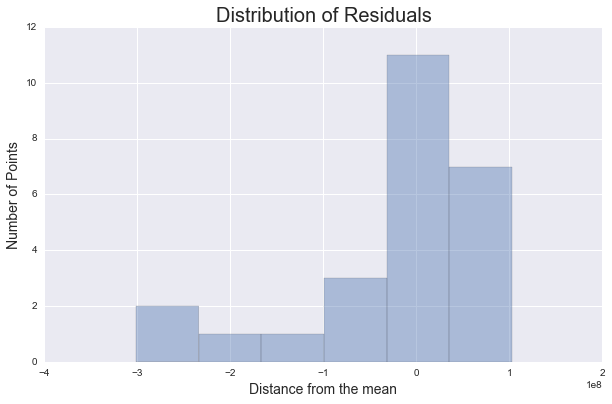

In [598]:
g  = sns.distplot(pred_4-y_4_test, kde = False)
g.figure.set_size_inches(10,6)
plt.title('Distribution of Residuals', fontsize = 20)
plt.xlabel('Distance from the mean', fontsize = 14)
_ = plt.ylabel('Number of Points', fontsize = 14)

### Interpretation

- Even when we add all the other features the R squared is still close to zeri and the distribution of the residuals are still skewed meaning that none of the features seem to be helpful in predicting gross domestic product.
- the model actually did better with just budget meaning that this feature alone is the most predictive feature and the others actually make performance worse